`python3 -m pip install -U pandas plotly nbformat`

`pip install "https://github.com/DCMLab/wavescapes/archive/refs/heads/johannes.zip"`

In [12]:
%reload_ext autoreload
%autoreload 2
import os
from itertools import product
from IPython.display import display, HTML
from wavescapes import all_wavescapes_from_pcvs, Wavescape, circular_hue, legend_decomposition

from etl import find_wavescapes, get_mag_phase_mx, get_metadata, get_pcvs, get_most_resonant
from utils import most_resonant, most_resonant2color

## Settings

In [13]:
DEBUSSY_REPO = '.'
#DATA_FOLDER = './data/data'
DATA_FOLDER = '~/DATA/debussy_figures/data'
WAVESCAPE_FOLDER = '~/DATA/debussy_figures/wavescapes'

## Loading metadata
All available files: Select a string and copy it into the next cell.

In [14]:
metadata = get_metadata(DEBUSSY_REPO)
metadata.index.to_list()

Metadata for 68 files.


['l000_etude',
 'l000_soirs',
 'l009_danse',
 'l066-01_arabesques_premiere',
 'l066-02_arabesques_deuxieme',
 'l067_mazurka',
 'l068_reverie',
 'l069_tarentelle',
 'l070_ballade',
 'l071_valse',
 'l082_nocturne',
 'l087-01_images_lent',
 'l087-02_images_souvenir',
 'l087-03_images_quelques',
 'l095-01_pour_prelude',
 'l095-02_pour_sarabande',
 'l095-03_pour_toccata',
 'l099_cahier',
 'l100-01_estampes_pagode',
 'l100-02_estampes_soiree',
 'l100-03_estampes_jardins',
 'l105_masques',
 'l106_isle',
 'l108_morceau',
 'l110-01_images_reflets',
 'l110-02_images_hommage',
 'l110-03_images_mouvement',
 'l111-01_images_cloches',
 'l111-02_images_lune',
 'l111-03_images_poissons',
 'l113-01_childrens_doctor',
 'l113-02_childrens_jimbos',
 'l113-03_childrens_serenade',
 'l113-05_childrens_golliwoggs',
 'l113-05_childrens_little',
 'l114_petit',
 'l115_hommage',
 'l117-02_preludes_voiles',
 'l117-03_preludes_vent',
 'l117-04_preludes_sons',
 'l117-05_preludes_collines',
 'l117-06_preludes_pas',
 

Also select the number of the following normalization methods where the boolean (de)activates `indulge_prototype`:

```python
{0: ('0c', False),
 1: ('post_norm', False),
 2: ('max_weighted', False),
 3: ('max', False),
 4: ('0c', True),
 5: ('post_norm', True),
 6: ('max_weighted', True),
 7: ('max', True)}
```

In [15]:
SELECTED = 'l108_morceau'
NORM = 4

### Processing settings

In [16]:
wavescape_folder = os.path.relpath(os.path.expanduser(WAVESCAPE_FOLDER), os.getcwd())
int2norm = {i: (how, indulge) for i, (indulge, how) in enumerate(product((False, True), ('0c', 'post_norm', 'max_weighted', 'max')))}
norm = int2norm[NORM]
print(wavescape_folder)

../DATA/debussy_figures/wavescapes


## Displaying existing wavescapes

The images can only be displayed if the Jupyter server can "see" the directory printed above and it won't throw a warning if it doesn't (except in the log). If you don't see any images below although you sure have set the correct `WAVESCAPE_FOLDER`, you probably need to start the Jupyter server from another directory as it cannot see "higher" than its own root. For example, if your wavescapes live on (Windows) drive D: you need to start the server on that drive.

In [17]:
def display_wavescapes(wavescape_folder, fname, norm_method):
    coeff2path = find_wavescapes(wavescape_folder, norm_method, fname=fname)
    html = "<table>"
    for row in (1, 4):
        html += "<tr>"
        for col in range(3):
            i = row + col
            html += "<td>"
            if i in coeff2path:
                html += f"<img src='{os.path.join(wavescape_folder, coeff2path[i])}' alt='coeff_{i}'/>"
            html += "</td>"
        html += "</tr>"
    html += "</table>"
    print(html)
    display(HTML(html))
    
display_wavescapes(wavescape_folder, SELECTED, norm)

<table><tr><td><img src='../DATA/debussy_figures/wavescapes/l108_morceau-c1-0c+indulge.png' alt='coeff_1'/></td><td><img src='../DATA/debussy_figures/wavescapes/l108_morceau-c2-0c+indulge.png' alt='coeff_2'/></td><td><img src='../DATA/debussy_figures/wavescapes/l108_morceau-c3-0c+indulge.png' alt='coeff_3'/></td></tr><tr><td><img src='../DATA/debussy_figures/wavescapes/l108_morceau-c4-0c+indulge.png' alt='coeff_4'/></td><td><img src='../DATA/debussy_figures/wavescapes/l108_morceau-c5-0c+indulge.png' alt='coeff_5'/></td><td><img src='../DATA/debussy_figures/wavescapes/l108_morceau-c6-0c.png' alt='coeff_6'/></td></tr></table>


,,
,,


## Most resonant

![legend](legend.png)

In [18]:
selected_norms = [int2norm[i] for i in (0,4)]
draw_settings = dict(label_size=8, aw_per_tick=10, tick_factor=10, tight_layout=False)
all_indulge_norms = get_mag_phase_mx(DATA_FOLDER, selected_norms, long=False)[SELECTED]
max_coeffs, max_mags, inv_entropies = get_most_resonant(all_indulge_norms)

In [19]:
def display_most_resonant(norm, by_max=True, by_ent=True):
    max_coeff, max_mag, inv_entropy = max_coeffs[norm], max_mags[norm], inv_entropies[norm]
    width = max_coeff.shape[0] * 2
    if by_max:
        summary_by_max = most_resonant2color(max_coeff, max_mag)
        ws = Wavescape(summary_by_max, width=width)
        ws.draw(label=f"Summary wavescape for {SELECTED}\nOpacity = magnitude of the most resonant", **draw_settings)
    if by_ent:
        summaray_by_ent = most_resonant2color(max_coeff, inv_entropy)
        ws = Wavescape(summaray_by_ent, width=width)
        ws.draw(label=f"Summary wavescape for {SELECTED}\nOpacity = inverse entropy of the 6 coeffs", **draw_settings)

for n in selected_norms:
    display_most_resonant(n)

Error in callback <function flush_figures at 0x7fc26a37f3a0> (for post_execute):


KeyboardInterrupt: 

## Creating wavescapes from scratch
This is slow but allows for comparing with the `ignore_phase` setting.

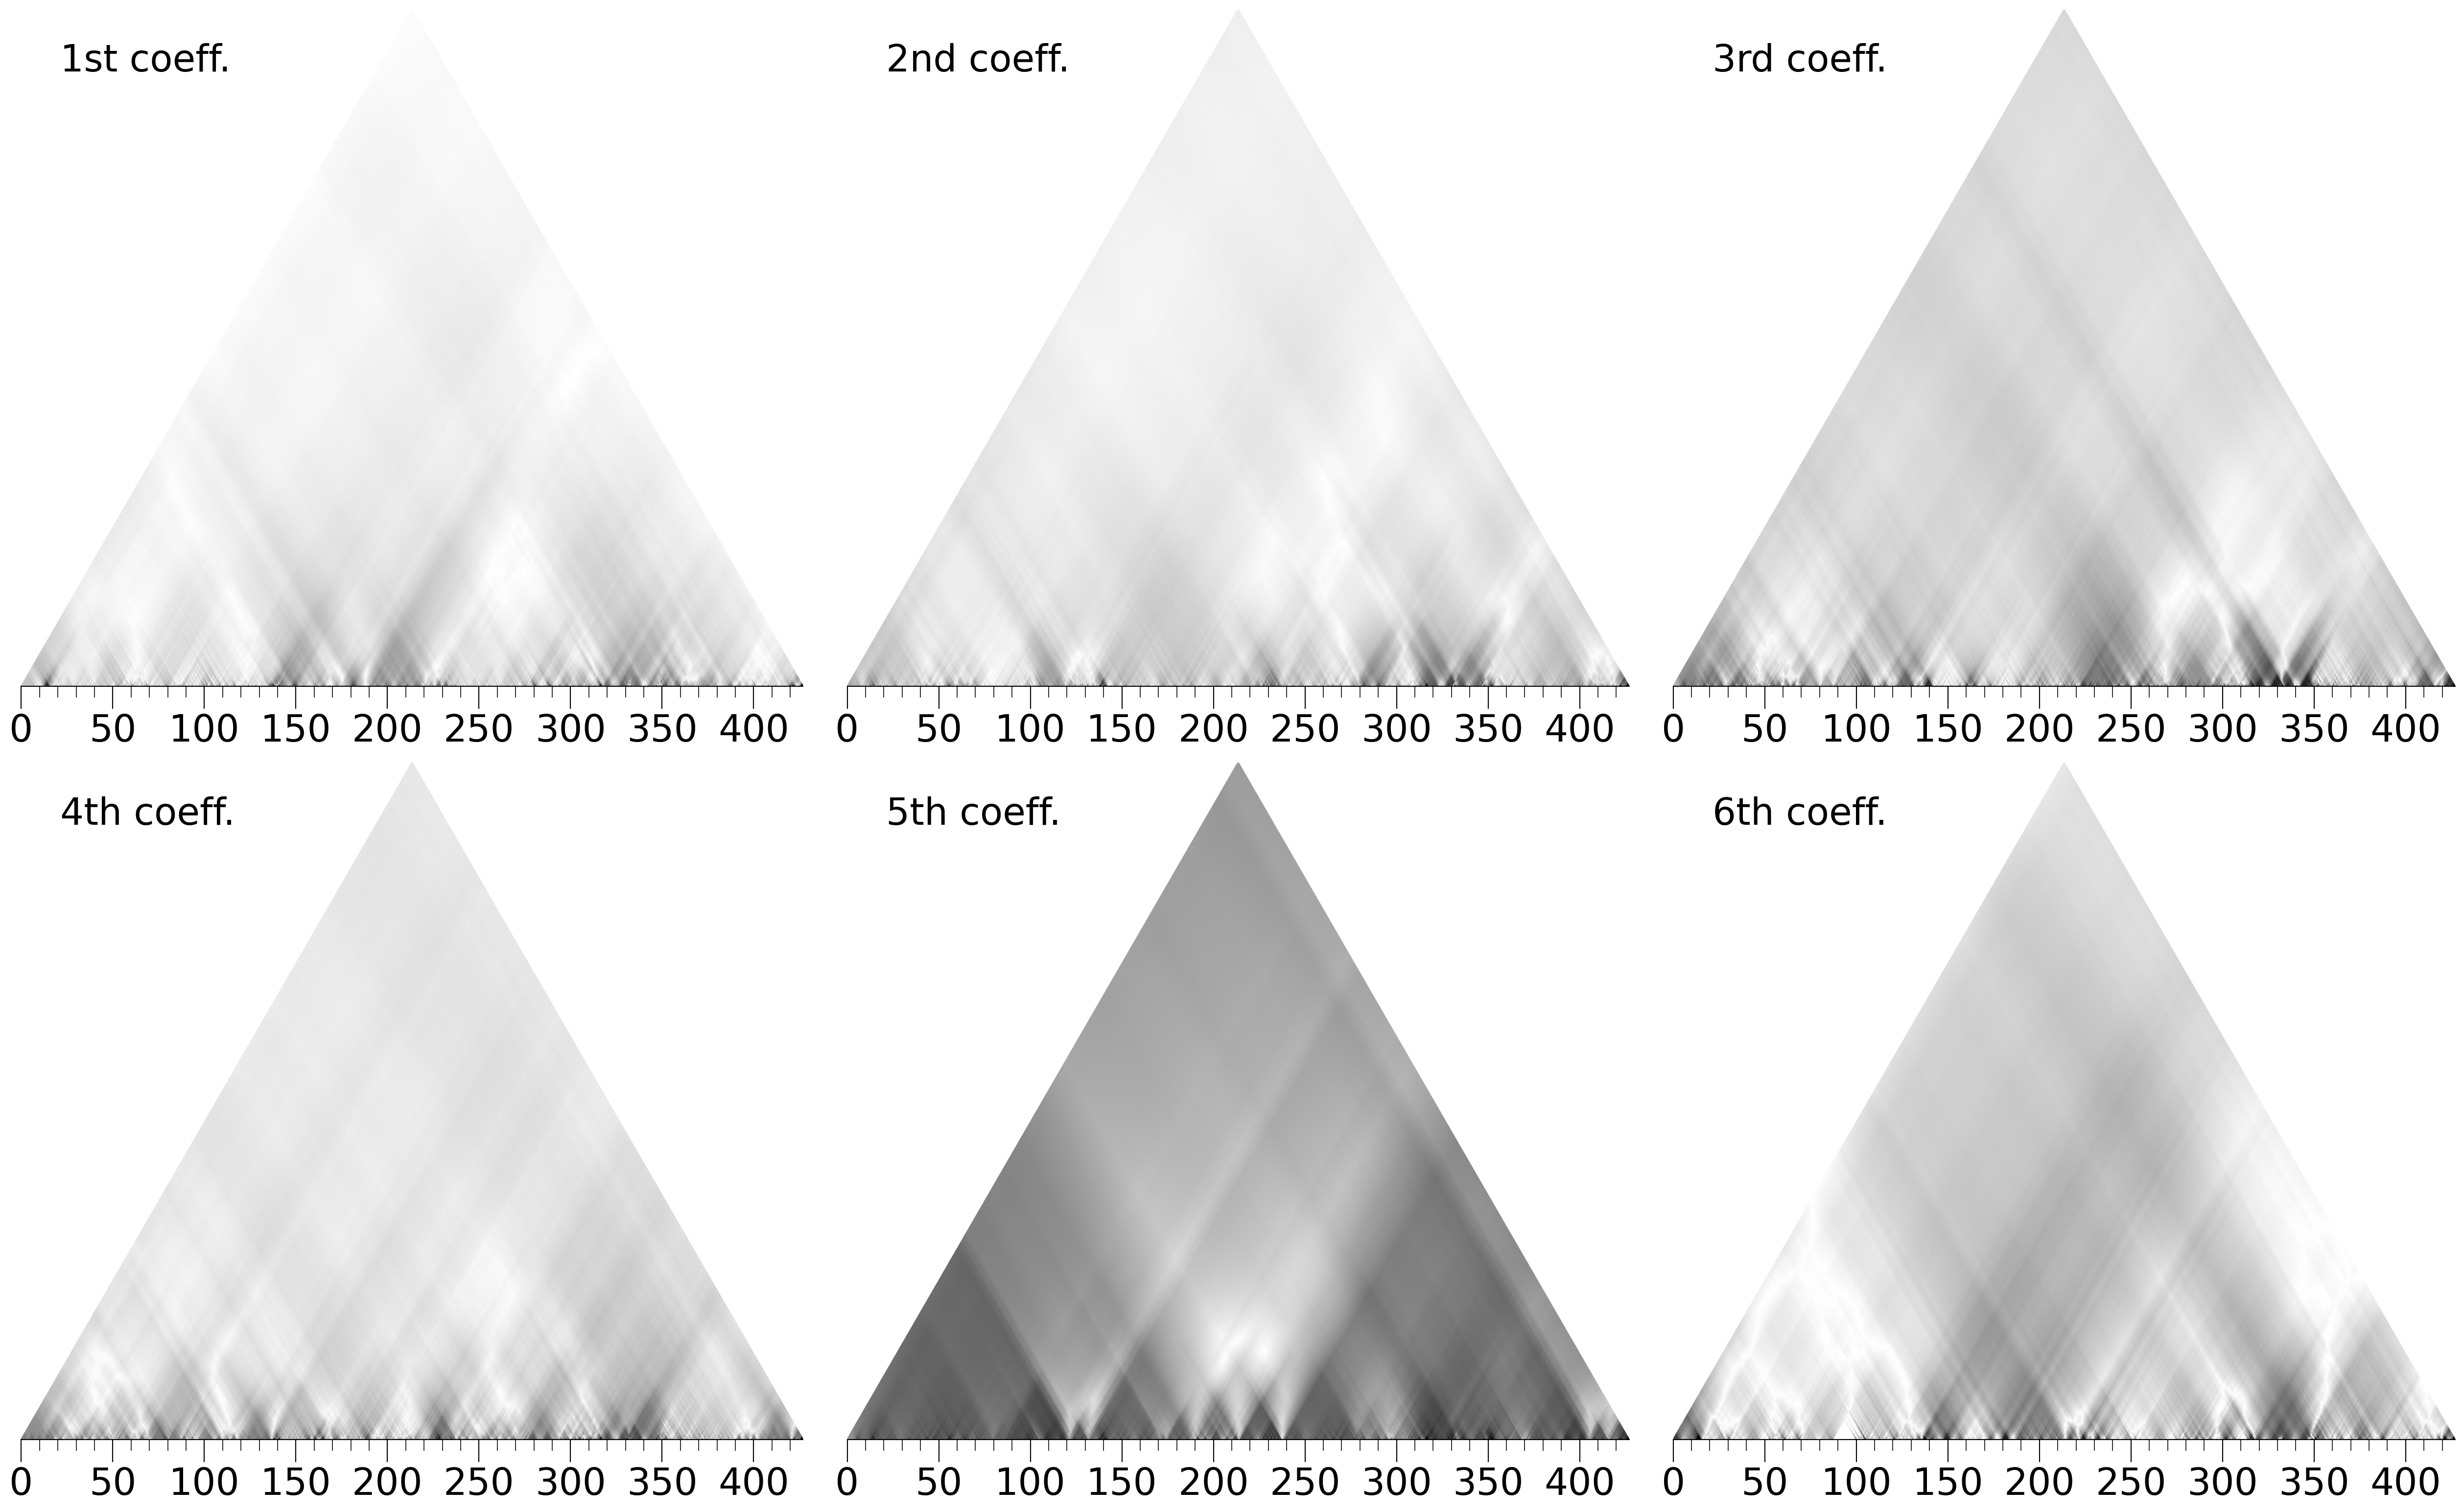

In [13]:
pcv = get_pcvs(DEBUSSY_REPO)[SELECTED]
width = pcv.shape[0] * 2
all_wavescapes_from_pcvs(pcv, width, magn_stra=norm[0], aw_per_tick=10, tick_factor=10, ignore_phase=True)